<a href="https://colab.research.google.com/github/fernanda-py/fernanda-py/blob/main/GPs_c_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesos Gaussianos con scikit learn
Vamos a usar este nb para generar GPs usando scikit learn. También para aprender a crear datasets con un comportamiento particular.

Primer dataset: Distribución uniforme

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Generamos los datos aleatorios
#np.random.seed(20250817)
x = np.linspace(0,4*np.pi,100)
y = x * np.sin(x)

#Observaciones
X = np.random.randint(0,4*np.pi,7)
Y = X * np.sin(X)

#Datos de entrenamiento
X_star = np.linspace(0,4*np.pi,100).reshape(-1,1)
Y_star = np.squeeze(x * np.sin(x))

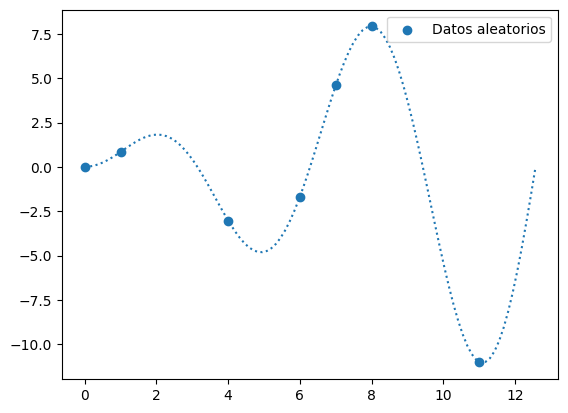

In [ ]:
plt.scatter(X,Y,label='Datos aleatorios')
plt.plot(x,y,linestyle = 'dotted')
plt.legend()
plt.show()

In [ ]:
# Comenzamos el proceso de entrenamiento
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [ ]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) #Se escoge el kernel y los hiperparámetros iniciales
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, alpha=1e-10) #acá se hace la optimización (maximizando likelihood)
gaussian_process.fit(X.reshape(-1, 1), Y)
gaussian_process.kernel_ #devuelve el kernel optimizado

6.44**2 * RBF(length_scale=1.67)

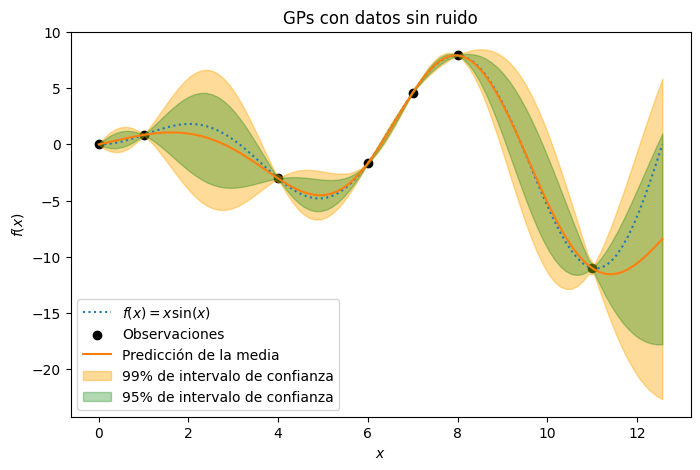

In [ ]:
#Ahora vamos a sacar la mean function y los intervalos de confianza

mean_prediction, std_prediction = gaussian_process.predict(X_star, return_std=True) #Se hace sobre los datos de entrenamiento (las t_star o tiempos predictivos)

plt.figure(figsize=(8,5))
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted") #La función que estamos estimando (en la vida real o en cosmo no la conocemos)
plt.scatter(X, Y, color = 'black',label="Observaciones") #Puntos de observación
plt.plot(X_star, mean_prediction, label="Predicción de la media") #Función sobre los datos de predicción que deben pasar sobre las observaciones

plt.fill_between(
    X_star.ravel(),
    mean_prediction - 2.98 * std_prediction,
    mean_prediction + 2.98 * std_prediction,
    alpha=0.4,color = 'orange',
    label=r"99% de intervalo de confianza",
)
plt.fill_between(
    X_star.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.3,color = 'green',
    label=r"95% de intervalo de confianza",
) #el fill between se hace sobre los t_star
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("GPs con datos sin ruido")
plt.show()